## Title

## Objectives: 
1. Choose a real-world phenomenon that can be measured.
2. Investigate the types of variables involved, their likely distributions, and their
relationships with each other, accross at least 4 variables.
3. Synthesise/simulate a data set as closely matching their properties as possible.


<br>

## Real World Phenomenon
***

### Hypertension
This project will explore *hypertension*, which is more commonly known as high blood pressure. This real world problem can result in stroke, heart<br>
disease and heart attacks. Blood pressure is measured using systolic blood pressure which measures the pressure in ones arteries when their heart<br>
beats, and diastolic blood pressure which measures the pressure in ones artetries between heart beats [1]. The Centers for Disease Control and<br>
Prevention defines hypertension as a systolic reading of ≥ 130 mmHg and/or a diastolic reading of ≥ 80 mmHg.



<br>

## Investigating the Variables
***
### Selection:
It is important to investigate relevant features when modeling ones data. For example in Machine Learning feature selection methods are used to<br>
reduce the number of input variables to useful ones that can make better predictions (Brownlee 2020). With this in mind some of the feature variables<br> 
that help predict hypertension will now be investigated before deciding what variables will be used  to model the real world phenomenon of hypertension.

Justin et al.(2013) detail how 467 abstracts related to hypertension were closely examined and how 11 articles of 467 were indentified that explored<br>
linear regression prediction models with incident hypertension as their outcome of interest. The results of these article showed that the following<br>
variables showed success in prediciting hypertension over a diverse age range: age, sex, body mass index, diabetes status, parental hypertension<br>
smoking and systolic/diastolic blood pressure. 

Further research identified a large scale study that was carried out by Ren et al (2020) on 68980 Chinese participants over a dynamic age range.<br>
Within the study sample circa 50% of the people had hypertension and risk factors were identified via random forest and linear regression models.<br>
The main risk factors identified were gender, age, height, weight, BMI, triglyceride levels and total cholesterol. <br>


It was interesting that BMI was positively prediciting blood pressure as it doesnt account for body fat percentage. Zeng at al. (2012) explored this in more<br>
detail on a sample size of 3559 subjects from 18 to 85 years old. The study used Pearsons Correlation analysis to model BMI, percent body fat and blood<br>
pressure before correcting for gender, age, lifestyle, and family history correlation via regression analysis. The results showed that BMI had a lower partial<br>
correlation with blood pressure than fat percenrage had with with blood pressure. Based on these findings percentage body fat will be included with the<br>
variables listed in table 1 to model hypertension.


<br>

<table style = 'float : left;'>
    <thead>
        <th></th>
        <th>Table1 (Variable Summary)</th>
        <th></th>
      </tr>
      <tr>
        <th>Variable Type</th>
        <th>Variable</th>
        <th>Units</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Continuous</td>
        <td>Systolic Blood Pressure (BPs)</td>
        <td>[mmHg]</td>
      </tr>
      <tr>
        <td>Continuous</td>
        <td>Systolic Blood Pressure (BPs)</td>
        <td>[mmHg]</td>
      </tr>
      <tr>
        <td>Continuous</td>
        <td>Body Fat</td>
        <td>[%]</td>
      </tr>
       <tr>
        <td>Continuous</td>
        <td>BMI</td>
        <td>[kg/m²]</td>
      </tr>   
      <tr>
        <td>Discrete</td>
        <td>Age</td>
        <td>Years</td>
      </tr>
      <tr>
        <td>Categorical</td>
        <td>Sex</td>
        <td>-</td>
      </tr>
      <tr>
        <td>Categorical</td>
        <td>Smoker</td>
        <td>-</td>
      </tr>
    </tbody>
 </table>




<br>

Hossian (2020) helps describe the variable types list in table 1 are described here:
- **Continuous**: Quantitative in the form of floats
- **Discrete**: Quantitative in the form of integers
- **Categorical**: Qualatative and can be divided into groups.




<br>

### Distributions
A probability distribution is a function that describes all of the possible outcomes of a random variable along with their corresponding probability values<br>
(Brooks-Bartless 2018). Choosing the correct distribution to fit ones data shape and data type is very important as this help to describe the dataset and will<br>
have an impact on how your data behaves in a machine learning model. The distributions of the different variables will now be explored. Note: An asterix *<br>
beside the distirbution represents the given distirubtion relative to hypertension.

<br>

*************************UPDATE THIS ON MAIN*************************

**Systolic & Diastolic Blood Pressure**<br>
Pater (2005) details how both systolic and diastolic blood pressure belong to simplified, theoeretical normal distribution. He then details the underlying<br>
distirbutions for both systolic and diastolic blood pressure as two overlaping bell curve shaped distributions, one for the people without hypertension and<br>
one for those with hypertension (see [here](https://trialsjournal.biomedcentral.com/articles/10.1186/1468-6708-6-5/figures/4)). He deduces that this combination tends to overlap and result in a somewhat normal distribution shape when the <br>population sampled from contains a mix of each health status. The overlap is less prominent in systolic blood pressure which results in a slightly right skewed<br>
distribution caused by a correlation between increasing age with increasing systolic blood pressure. 





<br>

**BMI and Body Fat Percentage**
- Penman et al.(2015) details a study caried out by Penman detailing the changing distribution of BMI in Mississippi's adults. The study ranged from 1990 to<br>
2003 with sample sizes varying from l,578 to a 4,422 samples per annum. He argued that, despite popular view, it had not been clearly proven that BMI follows<br>
the normal distribution. The study results yielded more of a log normal or right skewed distirbution, with the skew increasing overtime. The histogram of the 2003<br>
data shows a mean of 27.7 kg/m² and standard deviation of 6.1 (see [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/), Figure 2).<br><br>
- With regards to body fat percentage, a very interesting study took place in China with 5763 participants with an average age of 52 years[Zou (2015)]. Importantly<br>
they study had nearly a 50:50 split between overweight and underweight samples. The study showed a normal distribution for both males and females across the<br>
underweight, overweight and obese categories (see distributions [here](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-08832-0/figures/1)). The mean total body fat % (all categories lumped into one) was shown to be 25% and 35% <br>for men and woman respectively. 

<br>
    

**Age**<br>
The central statistics office in Ireland carried out an age profile in a 2016 Cencus. They showed the age distirbution of males and females accross the country<br>
(see [here](https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/), Figure 1.4). On analysis of the population pyramid it becomes clear that age distribution fluctuates accross the age range, but appears somewhat symmetric<br>between male and females for the given year. Sampling on a large very scale from such a distribution could yield a variety of outcomes. However if one sampled from a<br>
known age range it would be easier to predict the eventual distribution. Interestingly at the 35 year mark one can see somewhat of a bell curve shape appearing in the<br>
discrete data. Any smaller scale samples obviously would be much harder to predict based on population pyramid and would depend more on the population pyramid<br>
relvant to geographic sampling location.


<br>

**Smoker**<br>
A large study took place from 1989 to 2011 in China on 12900 particapents with all subjects being more than 18 years of age [Yao et al. (2020)]. This study will be leveraged<br>
further on to help model the distribution of smokers accross hypersensitive and non-hypersensitive people. The following breakdown was reported:
- 7369 people were non-smokers (60 %)
    - 2243 were hypersensitive
    - 5126 were not hypersensitive 
- 4913 people were smokers (40 %)
    - 2029 were hypersensitive
    - 2884 were not hypersensitive


<br>

**Variable Statistic Alligment**:<br>
Research up to this point has been taken from different sources. For allignment and modelling purposes the numerical hypertension variables from Table 1 will now be explored<br>
from a single study. Boledovičová et al.(2013) carried out a study on 120 men and 276 woman in Slovakia, where systolic and diastolic blood pressure readings were compared against<br>
age, BMI, weight and fat percentage. The study performed provided mean and standard deviation data on all variables (see table X) and performed Pearson’s correlation analysis between<br>
the variables (discussed more later). Importantly the study mentioned that normality was confirmed accross all variables, which mostly alligns with previous findings in distribution<br>
research above. One could argue that the study sample size of 396 people is too small to recognise Pater (2005) research that systolic blood has a slight right skew (see figure X below).
<br>


<table style = 'float : left;'>
    <caption>Table 3 [X]: Distribution Statistics</caption>
     <thead>      
      <tr>
        <th></th>
        <th>Male</th>
        <th>Male</th>
        <th>Female</th>
        <th>Female</th>  
      </tr>
    </thead>    
    <thead>      
      <tr>
        <th>Variable</th>
        <th>Mean</th>
        <th>Std Dev</th>
        <th>Mean</th>
        <th>Std Dev</th>  
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>BPs [mmHg]</td>
        <td>133.1</td>
        <td>17.0</td>
        <td>127.7</td>
        <td>17.5</td>
      </tr>
   
      <tr>
        <td>BPd [mmHg]</td>
        <td>82.5</td>
        <td>11.6</td>
        <td>78.5</td>
        <td>10.6</td>
      </tr>
      <tr>
        <td>Body Fat %</td>
        <td>23.3</td>
        <td>7.0</td>
        <td>29.4</td>
        <td>8.3</td>
      </tr>
      <tr>
        <td>BMI [kg/m²]</td>
        <td>26.8</td>
        <td>3.9</td>
        <td>24.8</td>
        <td>4.6</td>
      </tr>
      <tr>
        <td>Age</td>
        <td>46.1</td>
        <td>16.6</td>
        <td>45.4</td>
        <td>15.4</td>
      </tr>
    </tbody>
 </table>

In [132]:
# https://towardsdatascience.com/multivariate-normal-distribution-562b28ec0fe0 
## https://towardsdatascience.com/multivariate-normal-distribution-562b28ec0fe0


#correlations step 3 Step 3: P-value
## https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8#:~:text=A%20p%2Dvalue%20is%20the,sample%20occurred%20due%20to%20chance.

# interesting pearsons explanation validating al uses with normal distribution
## https://stats.stackexchange.com/questions/162547/why-is-pearsons-%CF%81-only-an-exhaustive-measure-of-association-if-the-joint-distri

<ipython-input-131-9a47bfaf2475>:28: RuntimeWarning: invalid value encountered in log
  log_normal = np.log(normal2)


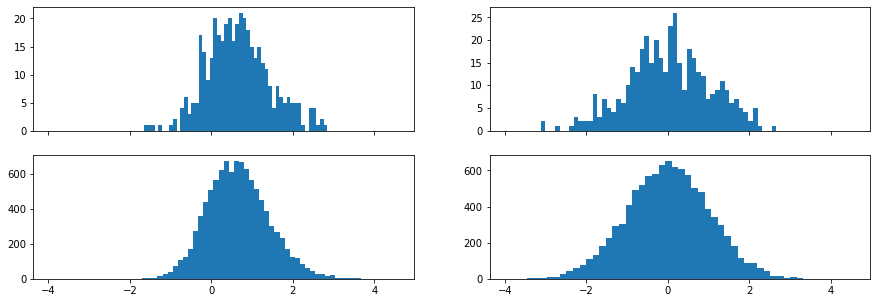

In [131]:
import numpy as np                          # for numerical operations
fig, ax = plt.subplots(2, 2, figsize = (15, 5), sharex = True, sharey = False)
rng = np.random.default_rng()





#ax1.hist(skew_normal)
#ax2.hist(normal)
#ax3.hist(re_norm)
#sns.kdeplot(log_normal)

#ax.hist(log_normal, bins = 40);


from scipy.stats import skewnorm 

# skew journal https://journals.sagepub.com/doi/pdf/10.1177/1747493020971905    #table 2
a = 1.4

data1 = skewnorm.rvs(a, size=400)
normal1 = rng.normal(0, 1, size = 400)

data2 = skewnorm.rvs(a, size=10000)
normal2 = rng.normal(0, 1, size = 10000)


log_normal = np.log(normal2)

#sns.kdeplot(data1, ax = ax[0, 0])
#sns.kdeplot(data2, ax = ax[0, 1])
#sns.kdeplot(normal1, ax = ax[1, 0])
#sns.kdeplot(normal2, ax = ax[1, 1])

ax[0, 0].hist(data1, bins = 50)
ax[0, 1].hist(normal1, bins = 50)

ax[1, 0].hist(data2, bins = 50)
ax[1, 1].hist(normal2, bins = 50);


<br>

### Tending towards normality
**Distribution Description**<br>
This normal distribution is continuous distribution that has one one local maximum in the centre (mean) where the distribution spreads symmetrically from this mode<br>
(calculated via standard deviation). See Figure 1 below for exploration of how the standard normal distribution changes with different mean and std dev values. The<br>
Standard Normal Distribution has defined data spread whereby:<br>
- 68.3 % of data falls withing one std devs of the mean.<br>
- 99.7 % of data falls withing three std devs of the mean.<br>

In [4]:
# import libraries
%matplotlib inline                      
import numpy as np                          # for numerical operations
import pandas as pd                         # for manipulating data arrays 
import statistics                           # to perfom stats on arrays
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting
from scipy.stats import norm

In [3]:
# generate array from -6 to 6 with 1000 increments
x = np.linspace(-6, 6, 1000)

def plot_normal_distribution(mean, std_dev, color, label_text):   
    '''This function uses probability density function to plot custom normal distributions'''
    ax.fill(x, norm.pdf(x, mean, std_dev), label = label_text, alpha = 0.7)
    return

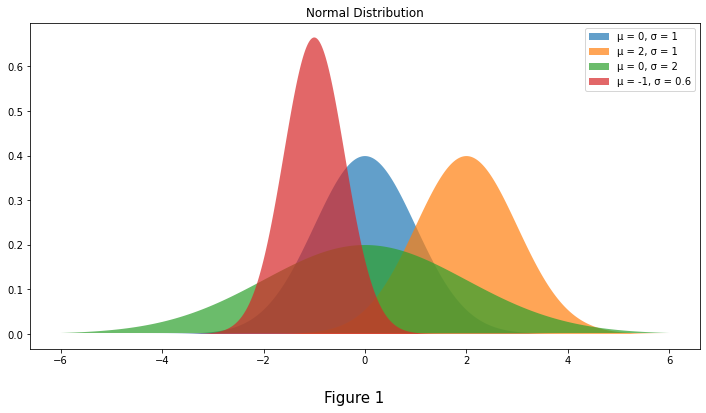

In [4]:
Fig, ax = plt.subplots(figsize = (12, 6))
plt.figtext(0.5, 0.0, 'Figure 1', wrap = True, horizontalalignment = 'center', fontsize = 15)
ax.set_title('Normal Distribution')

# function calls for different mean and std dev values
plot_normal_distribution(mean = 0, std_dev = 1, color = 'b', label_text = 'μ = 0, σ = 1')
plot_normal_distribution(mean = 2, std_dev = 1, color = 'g', label_text = 'μ = 2, σ = 1')
plot_normal_distribution(mean = 0, std_dev = 2, color = 'r', label_text = 'μ = 0, σ = 2')
plot_normal_distribution(mean = -1, std_dev = 0.6, color = 'y', label_text = 'μ = -1, σ = 0.6')
plt.legend()
plt.show()


**Bias**<br>
This distribution occurs in many real world phenomena such as age, height, test-scores, IQ scores, men's height etc. Sharama (2019) helps explain this by describing how<br>
larger data sets with finite variances and independent feature probabilities will have a data distribution that favours the bell curve shape. Charan (2020) then details<br>
how a popluations with mean μ and standard deviation σ will tend towards a normal distribution with a sufficient sample size, i.e the Central Limit Theorem. <br>


**Importance**<br>
The normal distribution is considered one of the most important of the probability distributions in statistics. Malif (2019) explores how its simple symmetric shape makes it<br>
easy to estimate the probability of certain events occuring via the normal probability density function, whereby the area under the curve represents the full probability range<br>
and equals to one. Many machine learning models including LDA, Guassian Naive Bayes, Logistic Regression and Linear Regression benifit from normalised data and are calculated<br>
assuming that the distribution is bivariate / multivariate normal [Barai 2020]. When dealing with such models cases arise where the target variables are not normally distributed<br>
and have to be transformed using methods such as linear , Boxcox or eo-Johnson Transformations [Malif (2019)]. 


<br>

### Correlation Analysis 


<table style = 'float : left;'>
    <caption>Table 2 [X]: Effects of obesity & smoking on Incidence of hypertension</caption>
    <thead>      
      <tr>
        <th>Status</th>
        <th>HR</th>
        <th>HR 95% CI</th>
        <th>P</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Overweight and nonsmoking</td>
        <td>1.990</td>
        <td>1.500 - 2.640</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Obesity and nonsmoking</td>
        <td>2.872</td>
        <td>2.441 - 3.378</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Overweight and current smoking</td>
        <td>1.878</td>
        <td>1.354 - 2.604</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Obesity and current smoking</td>
        <td>2.710</td>
        <td>2.227 - 3.299</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Normal weight and current smoking</td>
        <td>1.119</td>
        <td>1.013 - 1.236</td>
        <td>0.027</td>
      </tr>
    </tbody>
 </table>


<table style = 'float : left;'>
    <caption>Table 2 [X]: Effects of obesity & smoking on Incidence of hypertension</caption>
    <thead>      
      <tr>
        <th>Status</th>
        <th>HR</th>
        <th>HR 95% CI</th>
        <th>P</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Overweight and nonsmoking</td>
        <td>1.990</td>
        <td>1.500 - 2.640</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Obesity and nonsmoking</td>
        <td>2.872</td>
        <td>2.441 - 3.378</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Overweight and current smoking</td>
        <td>1.878</td>
        <td>1.354 - 2.604</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Obesity and current smoking</td>
        <td>2.710</td>
        <td>2.227 - 3.299</td>
        <td>&#60; 0.001</td>
      </tr>
      <tr>
        <td>Normal weight and current smoking</td>
        <td>1.119</td>
        <td>1.013 - 1.236</td>
        <td>0.027</td>
      </tr>
    </tbody>
 </table>

<br>

[X].Papathanasiou, G et al. (2015), Association of High Blood Pressure with Body Mass Index, Smoking and Physical Activity in Healthy Young Adults,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/) (Accessed 13 December 2021).


(array([  4.,   6.,  50., 134., 231., 262., 198.,  92.,  21.,   2.]),
 array([2.71728991, 2.71747812, 2.71766633, 2.71785454, 2.71804275,
        2.71823096, 2.71841917, 2.71860738, 2.71879559, 2.7189838 ,
        2.71917201]),
 <BarContainer object of 10 artists>)

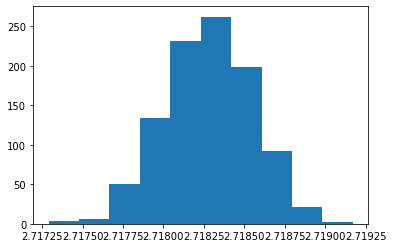

In [133]:
s = np.random.lognormal(0, 0.0001, 1000)
x = np.exp(s)
plt.hist(x)

In [ ]:
Indonesia Family Life Survey (IFLS) data from the 2000, 2007 and 2015 surveys nationally representative sample

# paper links 
1: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/
2:  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/

In [ ]:
(Effetcs of obesity and smoking on incidence of hypertension)


Boledovičová et al. (2013) 

# talk about different variables type....



# 2 x paper references 
Papathanasiou, G et al. (2015)

In [1]:
#Table 1 wil be useful for deducing incident rate to evaluate most important variables to model.
## https://www.ahajournals.org/doi/10.1161/HYPERTENSIONAHA.120.16354

# gives dist tables (not for each sex, doesnt do correlation stats)
#https://www.hindawi.com/journals/ijhy/2018/4186496/

## looks at dist tables for age, weight, height, bmi, heart rate in young greek adults, also does lienar regression etc....
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/


## Assumptions for pearsons correlation etc....(needs to be normally dist....use spearman if not)
# https://journals.lww.com/anesthesia-analgesia/fulltext/2018/05000/correlation_coefficients__appropriate_use_and.50.aspx

## Bivariate normal distributed is important for pearsons......
# https://www.statisticshowto.com/bivariate-normal-distribution/
#hist / scatter overlap regplot i think shows this 

# variable references:
https://bradpilon.com/weight-loss/body-fat-when-average-isnt-good-enough/   body fat percent fairly normal
    
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/        bmi slight right skew

### Distribution:

...

### Correlation:

Importance of drawing samples from distribution, as mean and std dev alone can not determine an accurate distribution
https://en.wikipedia.org/wiki/Anscombe%27s_quartet


link to paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/
Normality of variables distribution was checked and found satisfactorily


what variables are important for each variables .... how are they related?....

<table style = 'float : left;'>
<tr><th>Male Statistics </th><th>Female Statistics</th></tr>
<tr><td>

|Variable| Mean | Std Dev|
|--|--|--|
|BPs [mmHg]|133.1| 17.0|
|BPd [mmHg]|82.5 | 11.6|
|Age [years]|46.1|16.6|
|Body Fat [%]|23.2|7.0 |
|BMI [kg/m²]|26.8|3.9|

</td><td>

| Mean | Std Dev|
|--|--|
|127.7| 17.5|
|78.5 | 10.6|
|45.4|15.4|
|29.4|8.3|
|24.8|4.6|

</td></tr> </table>

## Simulating The Dataset

In [2]:
import matplotlib.pyplot as plt             # for plotting
import seaborn as sns                       # for plotting
import numpy as np                          # for numeric processing (from different distributions)
import pandas as pd                         # to generate dataframes & manipulat data

plt.rcParams['font.size'] = 13              # set default plot font size 
plt.rcParams["figure.figsize"] = (10, 6)    # set default figure font size 

In [3]:
def generate_multivariate_normal(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]    
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    
    print('variances are: {}'.format(variances))
    print('covariances are: {}'.format(covariance))
    print('covariance_matrix is: {}'.format(covariance_matrix))
    return array

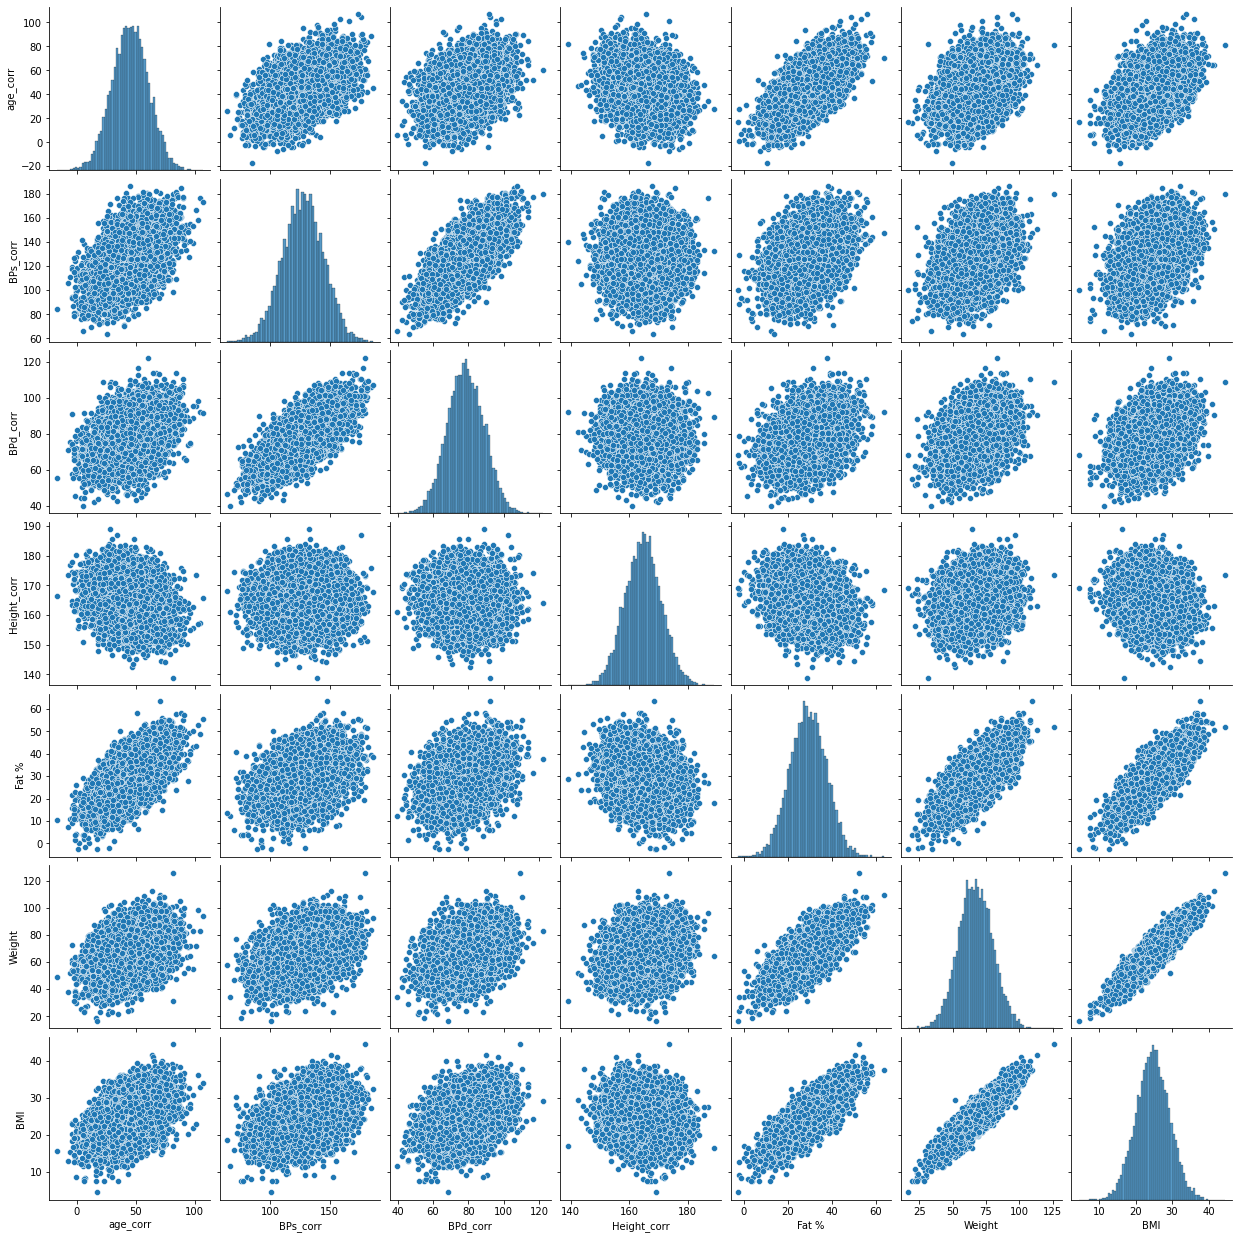

In [1]:
# correlation link
# https://oscarnieves100.medium.com/simulating-correlated-random-variables-in-python-c3947f2dbb10


import numpy as np
import pandas as pd
import seaborn as sns

mean = (45.4, 127.7, 78.5, 164.7, 29.4, 67.3, 24.8)
stdDev = (15.4, 17.5, 10.6, 6.1, 8.3, 12.8, 4.6)

var_age = 15.4**2
var_bps = 17.5**2
var_bpd = 10.6**2
var_height = 6.1**2
var_fat = 8.3**2
var_weight = 12.8**2
var_bmi = 4.6 ** 2

# covariance = pearsons corr. * (product of std devs)
    # note: std_dev = sqrt of variance  
cov_bpd_bps = 0.7 * np.sqrt(var_bpd * var_bps)
cov_age_bps = 0.46 * np.sqrt(var_age * var_bps)
cov_age_bpd = 0.33 * np.sqrt(var_age * var_bpd)

cov_height_age = -0.23 * np.sqrt(var_height * var_age)
cov_height_bps =  0 * np.sqrt(var_height * var_bps)
cov_height_bpd =  0.02 * np.sqrt(var_height * var_bpd)

cov_fat_age = 0.63 * np.sqrt(var_fat * var_age)
cov_fat_bps = 0.39 * np.sqrt(var_fat * var_bps)
cov_fat_bpd = 0.32 * np.sqrt(var_fat * var_bpd)
cov_fat_height = -0.25 * np.sqrt(var_fat * var_height)

cov_weight_age = 0.36 * np.sqrt(var_weight * var_age)
cov_weight_bps = 0.37 * np.sqrt(var_weight * var_bps)
cov_weight_bpd = 0.36 * np.sqrt(var_weight * var_bpd)
cov_weight_height = 0.20 * np.sqrt(var_weight * var_height)
cov_weight_fat = 0.73 * np.sqrt(var_weight * var_fat)

cov_bmi_age = 0.44 * np.sqrt(var_bmi * var_age)
cov_bmi_bps = 0.37 * np.sqrt(var_bmi * var_bps)
cov_bmi_bpd = 0.35 * np.sqrt(var_bmi * var_bpd)
cov_bmi_height = -0.16 * np.sqrt(var_bmi * var_height)
cov_bmi_fat = 0.81 * np.sqrt(var_bmi * var_fat)
cov_bmi_weight = 0.91 * np.sqrt(var_bmi * var_weight)


# This is a covariance matrix that will be fed into the random.multivariate_normal to correlate the data
# Performing this action was justified as all variables follow a normal distribution

#                 Age              BPs              BPd              Height               # Fat %           # weight         # BMI
cov_matrix =  [[var_age,        cov_age_bps,     cov_age_bpd,      cov_height_age,    cov_fat_age,     cov_weight_age,    cov_bmi_age   ],    # age
              [cov_age_bps,       var_bps,       cov_bpd_bps,      cov_height_bps,    cov_fat_bps,     cov_weight_bps,    cov_bmi_bps   ],    # BPs
              [cov_age_bpd,     cov_bpd_bps,       var_bpd,        cov_height_bpd,    cov_fat_bpd,     cov_weight_bpd,    cov_bmi_bpd   ],    # BPd 
              [cov_height_age,  cov_height_bps,  cov_height_bpd,     var_height,      cov_fat_height,  cov_weight_height, cov_bmi_height],    # height 
              [cov_fat_age,     cov_fat_bps,     cov_fat_bpd,      cov_fat_height ,      var_fat,      cov_weight_fat,    cov_bmi_fat   ],    # Fat %
              [cov_weight_age,  cov_weight_bps,  cov_weight_bpd,   cov_weight_height, cov_weight_fat,    var_weight,      cov_bmi_weight],    # weight             
              [cov_bmi_age,     cov_bmi_bps,     cov_bmi_bpd,      cov_bmi_height,    cov_bmi_fat,     cov_bmi_weight,        var_bmi   ]]    # BMI
 
multi2 = np.random.multivariate_normal(mean, cov_matrix, (10000), check_valid = 'warn') 
#normal2 = np.random.normal(mean, stdDev, (1000, 7))


dict = { 'age_corr' : multi2[:,0], 'BPs_corr' : multi2[:,1], 'BPd_corr' : multi2[:,2], 'Height_corr' : multi2[:,3], 'Fat %' : multi2[:,4], 'Weight' : multi2[:,5], 'BMI' : multi2[:,6]}
df = pd.DataFrame(dict)

#print(df.corr())
sns.pairplot(df)

In [6]:
'''
fig, ax = plt.subplots(4, 3, sharex = True, sharey = False, figsize = (15, 15))

ax[0, 0].hist(multi2[:,0])
ax[0, 1].hist(multi2[:,1])           
ax[0, 2].hist(multi2[:,2])

ax[1, 0].scatter(multi2[:,0], multi2[:,1])
ax[1, 1].scatter(multi2[:,1], multi2[:,2])
ax[1, 2].scatter(multi2[:,0], multi2[:,2])


ax[2, 0].hist(normal2[:,0])
ax[2, 1].hist(normal2[:,1])
ax[2, 2].hist(normal2[:,2])

ax[3, 0].scatter(normal2[:,0], normal2[:,1])
ax[3, 1].scatter(normal2[:,1], normal2[:,2])
ax[3, 2].scatter(normal2[:,0], normal2[:,2])
plt.show()
'''

'''
print('The Standard Dev of Age Cov = {}'.format(np.std(multi2[:,0])))
print('The Standard Dev of BPs Cov = {}'.format(np.std(multi2[:,1])))
print('The Standard Dev of BPd Cov = {}'.format(np.std(multi2[:,2])))

print('The Standard Dev of Age norm = {}'.format(np.std(normal2[:,0])))
print('The Standard Dev of BPs norm = {}'.format(np.std(normal2[:,1])))
print('The Standard Dev of BPd norm = {}'.format(np.std(normal2[:,2])))


print('The mean of Age Cov = {}'.format(np.mean(multi2[:,0])))
print('The mean of BPs Cov = {}'.format(np.mean(multi2[:,1])))
print('The mean of BPd Cov = {}'.format(np.mean(multi2[:,2])))

print('The mean of Age norm = {}'.format(np.mean(normal2[:,0])))
print('The mean of BPs norm = {}'.format(np.mean(normal2[:,1])))
print('The mean of BPd norm = {}'.format(np.mean(normal2[:,2])))
''';

In [7]:
def test(means, std_devs, corr_coeff, num_samples):
    '''This fuction returns a multivariate normal array'''
    
    # Construct new Generator using default BitGenerator(PCG64) and store in rng variable
    rng = np.random.default_rng(100)
    
    variances = np.square(std_devs) 
    covariance = corr_coeff * (std_devs[0] * std_devs[1]) 
    covariance_matrix = [[variances[0], covariance], [covariance, variances[1]]]  
    array = rng.multivariate_normal(means, covariance_matrix, num_samples)
    return array

In [8]:
# male array formation
# element order: BPs, BPd, Age, fat%, BMI
#means = {'Male' :[133.1, 82.5, 46.1, 23.2, 26.8], 'Female': [127.7, 78.5, 45.4, 29.4, 24.8]}  
#std_devs = {'Male' :[17.0, 11.6, 16.6, 7.0, 3.9], 'Female': [17.5, 10.6, 15.4, 8.3, 4.6]}  


#corr_coeff = 0.5
#num_samples = 120

#male_weight_vs_fat = generate_multivariate_normal(means, std_devs, corr_coeff, num_samples)
#male_gender = np.repeat('Male', num_samples)

In [9]:
import matplotlib.pyplot as plt
import numpy as np 
plt.close('all')
np.random.seed(0) # Set seed
# Inputs
samples = 1000
# Random samples (Uniformly distributed)
U1 = np.random.rand(samples,1)
U2 = np.random.rand(samples,1)

# Random samples (normally distributed uncorrelated) 
S1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
S2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)

E_S1 = np.mean(S1)
Var_S1 = np.mean(S1**2) - E_S1**2
sigma_S1 = np.sqrt(Var_S1)
E_S2 = np.mean(S2)
Var_S2 = np.mean(S2**2) - E_S2**2
sigma_S2 = np.sqrt(Var_S2)
Cov_S1_S2 = np.mean(S1*S2) - E_S1*E_S2
Corr_S1_S2 = Cov_S1_S2/sigma_S1/sigma_S2
print('corr(S1,S2) = ' + str(Corr_S1_S2))


# Correlated random samples
mu_x = 0.5
mu_y = 0.66
sigma_x = 0.85
sigma_y = 1.24

# correlation co-efficienbt
rho = 0.5
X = mu_x + sigma_x * S1
Y = mu_y + sigma_y * (rho*S1 + np.sqrt(1-rho**2)*S2)

E_X = np.mean(X)
Var_X = np.mean(X**2) - E_X**2
sigma_X = np.sqrt(Var_X)
E_Y = np.mean(Y)
Var_Y = np.mean(Y**2) - E_Y**2
sigma_Y = np.sqrt(Var_Y)
Cov_X_Y = np.mean(X*Y) - E_X*E_Y
Corr_X_Y = Cov_X_Y/sigma_X/sigma_Y


print('corr(X,Y) = ' + str(Corr_X_Y))

corr(S1,S2) = 0.019217338842404088
corr(X,Y) = 0.5166452650549082


Text(0, 0.5, 'Y')

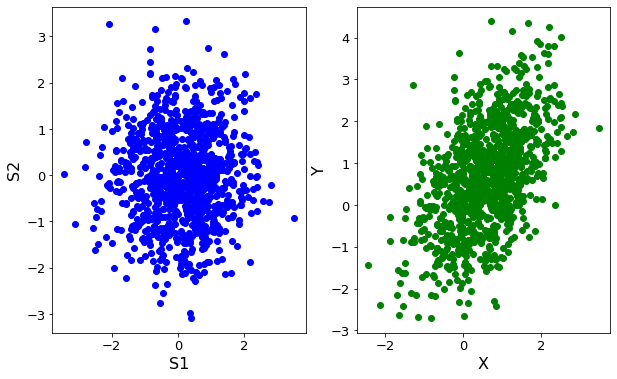

In [10]:
# Generate plots
plt.subplot(1,2,1)
plt.plot(S1,S2,linestyle="",marker="o",color="blue")
plt.xlabel('S1', fontsize=16)
plt.ylabel('S2', fontsize=16)
plt.subplot(1,2,2)
plt.plot(X,Y,linestyle="",marker="o",color="green")
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

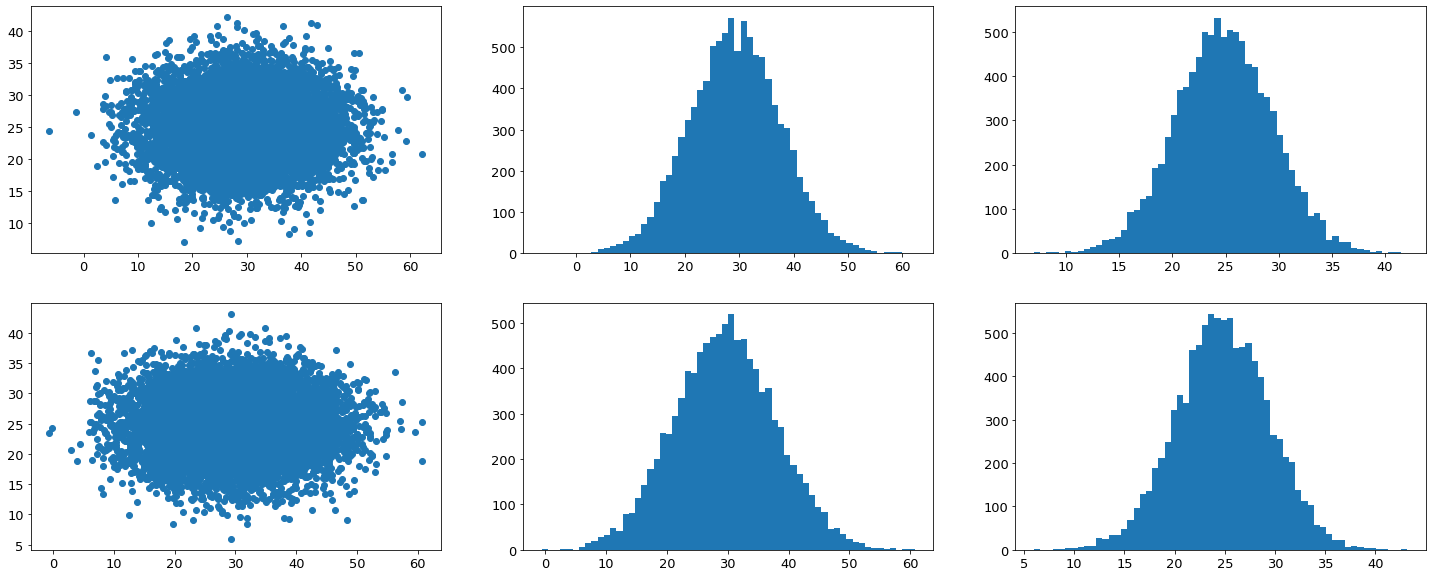

8.32029904253989
8.301150097266879
4.568902355829749
4.617268481006075


In [9]:

'''This fuction returns a multivariate normal array'''
rng = np.random.default_rng(100)
    #variances = np.square(std_devs) 
    #covariance_one = corr_coeff[0] * (std_devs[0] * std_devs[1]) 
    #covariance_two = corr_coeff[1] * (std_devs[2] * std_devs[3]) 
    
'''
mean = (45.4 ,67.3 ,164.7 ,29.4 ,127.7,78.8, 24.8)
covariance_matrix = [
    [1,     0.36, -0.23, 0.63,  0.46,  0.33, 0.44],
    [0.36,  1   ,  0.2,  0.73,  0.37,  0.36, 0.91],
    [-0.23, 0.2 ,  1,   -0.25, -0.00,  0.02,-0.16],
    [0.63,  0.73, -0.25, 1     ,0.39,  0.32, 0.81],
    [0.46,  0.37, -0.00, 0.39,  1,     0.7,  0.37],
    [0.33,  0.36,  0.02, 0.32,  0.7,   1,    0.35],
    [0.44,  0.91, -0.16, 0.81,  0.37,  0.35, 1]]
    '''

# fat%, BMI after 
mean = (29.4, 24.8) 
var1 = np.square(8.3)
var2 = np.square(4.6)
cor = 0.2

#covariance_matrix = [[np.square(8.3+4.6), 1], [1, np.square(4.6+8.3)]] 
covariance_matrix = [[var1, cor], [cor, var2]] 
multi_array = rng.multivariate_normal(mean, covariance_matrix, 10000)
fat_normal = rng.normal(29.4, 8.3, 10000)
bmi_normal = rng.normal(24.8, 4.6, 10000)

fig, ax = plt.subplots(2, 3, figsize = (25, 10), sharex = False, sharey = False)
ax[0, 0].scatter(multi_array[:,0], multi_array[:,1])
ax[0, 1].hist((multi_array[:,0]), bins = 60)
ax[0, 2].hist((multi_array[:,1]), bins = 60)

ax[1, 0].scatter(fat_normal, bmi_normal)
ax[1, 1].hist(fat_normal, bins = 60)
ax[1, 2].hist(bmi_normal, bins = 60)
plt.show()

print(np.std(multi_array[:,0]))
print(np.std(fat_normal))
print(np.std(multi_array[:,1]))
print(np.std(bmi_normal))

In [10]:
'''
Table 1
Basic sample characteristics – men.

Variable	Count	Mean	Standard deviation
BMI	120	26.8	3.9
Weight [kg]	120	84.4	13.2
Fat percentage	120	23.3	7.0
Age [years]	120	46.1	16.6
Height [cm]	120	176.9	7.6
BPs [mmHg]	120	133.1	17.0
BPd [mmHg]	120	82.5	11.6
BMI – Body Mass Index [kg/m2]; Fat percentage – percentage of total body fat [%]; BPs – systolic blood pressure; BPd – diastolic blood pressure.
''';

## References
[X] CDC, 2021, High Blood Pressure Symptoms and Causes, Available at:<br>
[Ref X](https://www.cdc.gov/bloodpressure/about.htm) (Accessed 08 December 2021).<br>

<br>

[X]. Singh, S, 2019, Getting the Basics of Correlation & Covariance, Available at:<br>
[Ref X](https://towardsdatascience.com/getting-the-basics-of-correlation-covariance-c8fc110b90b4) (Accessed 07 December 2021).


<br>

[X]. Justin, B, et al. (2013), Risk Models to Predict Hypertension: A Systematic Review, Plos One, Availabile at:<br>
[Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3702558/) (Accessed 08 December 2021).

<br>

[X]. Glen, S, 2021, What is a C-Statistic?, Statistics How To, Available at: <br>
[Ref X](https://www.statisticshowto.com/c-statistic/) (Accessed 09 December 2021).


<br>

[X].Papathanasiou, G et al. (2015), Association of High Blood Pressure with Body Mass Index, Smoking and Physical Activity in Healthy Young Adults,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4378027/) (Accessed 13 December 2021).


<br>

[X]. Boledovičová, M et al. (2013), Blood pressure relation to body composition and age: Analysis of a nurse-led investigation and consultation program,<br>
Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3728227/) (Accessed 13 December 2021).


<br>


[X]. Brownlee, J, 2020, How to Choose a Feature Selection Method For Machine Learning, Available at:<br>
[Ref Link X](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) (Accessed 13 December 2021).


<br>

[X]. Ren, Z et al (2020), A novel predicted model for hypertension based on a large cross-sectional study, Available at:<br>
[Ref Link X](https://www.nature.com/articles/s41598-020-64980-8) (Accessed 13 December 2021).


<br>

[X]. Zeng, Q at al. (2012), Percent body fat is a better predictor of cardiovascular risk factors than body mass index, Available at:<br>
[Ref Link X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3854278/) (Accessed 13 December 2021)



<br>

[X]. Pater, C, 2005, The Blood Pressure "Uncertainty Range" – a pragmatic approach to overcome current diagnostic uncertainties (II), Avilabile at:<br>
[Ref Link X](https://trialsjournal.biomedcentral.com/articles/10.1186/1468-6708-6-5) (Accessed 14 December 2021).

<br>

[X]. Hossian, Z, 2020, Get Familiar with the Most Powerful Weapon of Data Science Variables, Available at:<br>
[Ref Link X:](https://towardsdatascience.com/get-familiar-with-the-most-important-weapon-of-data-science-variables-48cc7cd85dc5) (Accessed 13 December 2021).

<br>
Hossian (2020)


<br>

[X]. Brownlee, J, 2019, just a collection of parameterized probability distributions, Available at:<br>
[Ref Link X ](https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/) (Accessed 14 December 2021).

<br>

[X]. Brooks-Bartlett, J, 2018, What is a probability distribution?, towards data science,
Available at: [Ref Link X](https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc), (Accessed 15 November 2021).


<br>


[X]. Penman, A et al. (2015), BThe Changing Shape of the Body Mass Index Distribution Curve in the Population: Implications for Public Health Policy to<br>
Reduce the Prevalence of Adult Obesity, Available at: [Ref X](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1636707/) (Accessed 15 December 2021).



<br>

[X]. Zou, Q et al. (2015), The association between physical activity and body fat percentage with adjustment for body mass index among middle-aged adults:<br>
China health and nutrition survey in 2015, BMC Public Health, Available at: [Ref X](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-08832-0) (Accessed 15 December 2021).

<br>


[X]. Yao, F et al. (2020), BMI modified the association of current smoking with the incidence of hypertension in Chinese population: a 22-year cohort study,<br>
BMC Public Health, Available at: [Ref Link X](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-020-8428-z) (Accessed 20 December 2021).

<br>


[X]. Sharma, R, 2019, Gaussian distribution, towards data science,<br>
Available at: [Ref link X](https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac), (Accessed 15 October 2021). <br>

<br>

[X]. Charan, R, 2020, towards data science, Why is the Normal Distribution so Normal? Available at:<br>
[Ref Link X](https://towardsdatascience.com/why-is-the-normal-distribution-so-normal-e644b0a50587) (Accessed 20 December 2021).

<br>

[X]. Malik, F, 2019, Ever Wondered Why Normal Distribution Is So Important?, towards data science, Available at:<br>
[Ref Link X](https://medium.com/fintechexplained/ever-wondered-why-normal-distribution-is-so-important-110a482abee3) (Accessed 20 December 2021).

<br>

[X]. Barai, A, 2020, Normal Distribution and Machine Learning, medium.com, Available at:<br>
[Ref Link X](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070) (Accessed 20 December 2021).

<br>



<br>



<br>



<br>



<br>
